# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

![Model of a neuron](https://drive.google.com/uc?id=1lHXapUp5zWXMYuqvP6ci896VN2So0-yS)
<center>Figure 1. Model of a neuron</center>

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select dierent nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

In [ ]:
import numpy as np

def step_function(x):
    if (x<0):
        return 0
    return 1

def ramp_function(x):
    return np.max([0, x])

def sigmoid_function(x, a=1):
    return 1.0/(1+np.exp(-a*x))

def neuron(x, w, activation=lambda a:a):
    return activation(np.dot(np.concatenate([[-1], x]), w))

In [ ]:
print(np.concatenate([[-1],[0.5,1,0.7]]))
print(np.dot(np.concatenate([[-1],[0.5,1,0.7]]), np.random.rand(4)))
print(sigmoid_function(np.dot(np.concatenate([[-1],[0.5,1,0.7]]), np.random.rand(4))))

[-1.   0.5  1.   0.7]
0.6832187267957213
0.7786603542108261


**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and calculate the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [ ]:
w=np.random.rand(4)

x1=np.array([0.5, 1, 0.7])
x2=np.array([0, 0.8, 0.2])

print(neuron(x1, w, step_function))
print(neuron(x2, w, step_function))
print()

print(neuron(x1, w, ramp_function))
print(neuron(x2, w, ramp_function))
print()

print(neuron(x1, w, sigmoid_function))
print(neuron(x2, w, sigmoid_function))

1
1

1.4379370657561015
0.6509937100883925

0.8081349909608432
0.6572343580196831


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

![Three neuron network](https://drive.google.com/uc?id=1pU0aERjmaLXx19lmLzRNlybIFuaiHHH9)
<center>Figure 2. Three neuron network</center>



In [ ]:
def three_neuron_network(x):
    w1=np.array([1, 0.5, 1, -0.4])
    w2=np.array([0.5, 0.6, -1.5, -0.7])
    w3=np.array([-0.5, -1.5, 0.6])
    
    neuron_one=neuron(x, w1, sigmoid_function)
    neuron_two=neuron(x, w2, sigmoid_function)
    
    neuron_three=neuron(np.concatenate([[neuron_one], [neuron_two]]), w3, sigmoid_function)
    
    return neuron_three    

**Tasks**

1. What is the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$?
2. Does the output of the network depend on neuron weights?

**Answers**
1. `0.5021828523608841`
2. Yes, different weights will influence the values passed to the next neuron

In [ ]:
x=np.array([0.3, 0.7, 0.9])
print(three_neuron_network(x))

0.5021828523608841


## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in the Figure. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

![One neuron network](https://drive.google.com/uc?id=15DOXVLkJlhte0q14GozgVp9KsL4TLfkG)
<center>Figure 3. One neuron network</center>

**Tasks**

1. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


**Answers**
1. A learning rate too high does not converge into an answer. Anything bigger than `0.5` for a fixed starting weight $w=[0.5, 0.5, 0.5]$ does not finish. And after testing, ~0.2 seems to give the lowest amount of iterations, lower than that and the learning rate is too small, which takes longer to get to an acceptable value.
2. To accept a `y` of `1`, the `y_predicted` value should be as close to `1` as possible, and not lower than `0.5`. If we say that the minimun acceptable value to consider `1` as an answer is `0.51`, then the max accepted error would be `1-0.51=0.49` => `MSE=0.49*0.49=0.2401`. The same can be made for `y` of `0`. The error can be smaller than this to accept results closer to `0` and `1`. 
3. Depends on the learning rate value and initial weights.

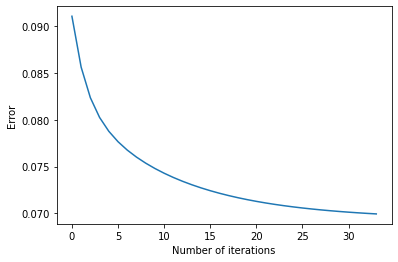

In [66]:
x1=[-1, 0, 0]
x2=[-1, 0, 1]
x3=[-1, 1, 0]
x4=[-1, 1, 1]

y1=y2=y3=0
y4=1

X=np.array([x1, x2, x3, x4])
Y=np.array([y1, y2, y3, y4])

w=np.random.rand(3)

eta=0.05  # learning rate
error_threshold=7e-2
errors=[];

while True:
    mse=0
    for x, y in zip(X, Y):
        y_predicted=np.dot(x, w)
        e=y-y_predicted
        mse+=e*e
        
        dw=eta*e*x
        w+=dw
    mse/=X.shape[0]
    
    errors.append(mse)
    if (mse<error_threshold):
        break

import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

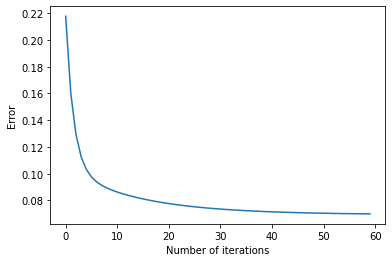

iterations:  60
err values


In [70]:
def one_neuron(w=np.random.rand(3), eta=0.05, error_threshold=7e-2):
  x1=[-1, 0, 0]
  x2=[-1, 0, 1]
  x3=[-1, 1, 0]
  x4=[-1, 1, 1]

  y1=y2=y3=0
  y4=1

  X=np.array([x1, x2, x3, x4])
  Y=np.array([y1, y2, y3, y4])

  errors=[];

  while True:
      mse=0
      for x, y in zip(X, Y):
          y_predicted=np.dot(x, w)
          e=y-y_predicted
          mse+=e*e
          
          dw=eta*e*x
          w+=dw
      mse/=X.shape[0]
      
      errors.append(mse)
      if (mse<error_threshold):
          break
  return errors


err = one_neuron()

plt.plot(err)
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

# for lr in np.arange(0.1, 0.5, 0.1):
#   print(lr)

print('iterations: ', len(err))
print('err values')